In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math

In [4]:
data_Train=pd.read_csv('/content/drive/MyDrive/dataset/polynomial_train.csv')
data_Train = data_Train.drop(columns='Unnamed: 0') 
data_Train

,A,B,C,label
0,-1113.924581,952.105404,-276.045881,-1.294289e+03
1,-2229.480228,1111.488568,-93.454107,-2.714687e+04
2,2717.257713,53.431237,-179.228591,6.474300e+04
3,-1638.783965,-632.919447,-106.170237,-7.349871e+03
4,5173.934338,-721.895577,-75.074840,1.651328e+06
...,...,...,...,...
49995,-401.109554,205.180269,-123.837422,-6.275985e+00
49996,832.536891,-723.312711,-128.736597,2.390843e+02
49997,-533.446993,1171.457335,-130.840925,-2.857080e+02
49998,1810.499103,-424.111696,-128.334986,8.161595e+03


In [5]:
data_Test=pd.read_csv('/content/drive/MyDrive/dataset/polynomial_test_data.csv')
data_Test = data_Test.drop(columns='ids') 
data_Test

,A,B,C
0,-961.622191,789.966580,-43.660479
1,3460.005131,786.092527,-144.096657
2,1648.281427,241.985600,-267.040826
3,-5361.100419,1062.669779,-199.007043
4,-2303.208688,-248.185768,-317.468950
...,...,...,...
19995,-1941.831479,284.320247,-88.712478
19996,-993.524028,535.348652,-97.151458
19997,665.127361,683.355125,-184.768610
19998,-80.508468,-24.409192,-153.713418


In [6]:
def normalize_data(x):
 mu=np.mean(x,axis=0)
 sigma=np.std(x,axis=0)
 x=(x-mu)/sigma
 return x

In [7]:
X=data_Train.to_numpy()
m=X.shape[0]
n=(X.shape[1]-1)
X_Train=X[:,:n]
print(X_Train.shape)
print(X_Train)
# X_Train=normalize_data(X_Train)
Y_Train=X[:,n]
Y_Train=Y_Train.reshape(m,1)
print(Y_Train.shape)
print(Y_Train)



(50000, 3)
[[-1113.92458108   952.10540425  -276.04588086]
 [-2229.48022767  1111.48856784   -93.4541072 ]
 [ 2717.25771283    53.43123706  -179.22859092]
 ...
 [ -533.44699332  1171.45733504  -130.84092473]
 [ 1810.49910349  -424.11169601  -128.33498562]
 [ -861.91021653   257.2959923   -176.1228714 ]]
(50000, 1)
[[ -1294.28891782]
 [-27146.87008356]
 [ 64743.00171817]
 ...
 [  -285.70796526]
 [  8161.59530383]
 [  -255.16713134]]


In [8]:
X_Test=data_Test.to_numpy()
m=X_Test.shape[0]
n=(X_Test.shape[1])
X_Test=X_Test[:,:n]
print(X_Test.shape)
print(X_Test)


(20000, 3)
[[ -961.62219071   789.96658017   -43.66047882]
 [ 3460.00513094   786.0925266   -144.09665669]
 [ 1648.28142716   241.98559957  -267.04082638]
 ...
 [  665.12736087   683.35512523  -184.76861036]
 [  -80.50846817   -24.40919225  -153.71341796]
 [-2997.29890736   778.62209693   -59.34016472]]


In [11]:
class PolynomialRegression:
  def create_polynomial(X):
    m=X.shape[0]
    A=X[:,0]
    A=np.reshape(A,(m,1))
    B=X[:,1]
    B=np.reshape(B,(m,1))
    C=X[:,2]
    C=np.reshape(C,(m,1))
    X_Poly=np.zeros((m,1))
    n=int(input("Enter the degree of polynomial you want "))
    a=0
    # X_Poly_empty=np.empty((m,a))
    for i in range(n+1):
      for j in range(n+1-i):
        for k in range(n+1-j-i):
          if  i==0 and j==0 and k==0:
            a+=1
            # print(X_Poly.shape)
            continue
          else:
            a+=1  
            X_Poly=np.append(X_Poly,((A)**i)*((B)**j)*((C)**k),axis=1)
            # print(X_Poly.shape)
    X_Poly = np.delete(X_Poly, 0, axis=1)
    return X_Poly
  def Train_data(x,y,learning_rate,no_of_iterations,L):  #L is regularization constant
    m=x.shape[0]
    n=x.shape[1]
    w=(np.zeros((n,1)))
    b=0
    # for keeping cost data reserved
    cost=[]
    for i in range(no_of_iterations):
      y_pred=np.dot(x,w)+b
      cost_i = (1/(2*m))*np.sum(np.square(y_pred - y))+ (L/2*m)*np.sum(np.square(w)) 
      a=np.array(y_pred - y)
      a1 = a.transpose()
      derivative_w=(1/m)*np.dot(a1,x)
      derivative_w_T=derivative_w.transpose()
      derivative_b=(1/m)*np.sum(y_pred-y)
      w=w*(1-(learning_rate*L)/m)-learning_rate*derivative_w_T
      b=b-learning_rate*derivative_b
      cost.append(cost_i)
      if(i%math.ceil(no_of_iterations/400) == 0):
            print('Cost is:',cost_i,'after ',i,'iterations')
           

    return w,b,cost  
  def costPlot(cost, iters):
        plt.plot(np.arange(iters), cost, '-b')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        plt.show() 
  def predict(x,w,b):
    return np.dot(x,w)+b        
  def r2_score(yp,y):
        ymean=np.mean(y)
        ssr=np.sum(np.square(yp-y))
        ssm=np.sum(np.square(y-ymean))
        r2=1-(ssr/ssm)
        return r2


In [12]:
X_Poly=PolynomialRegression.create_polynomial(X_Train)
X_Poly_Test=PolynomialRegression.create_polynomial(X_Test)

Enter the degree of polynomial you want 5
Enter the degree of polynomial you want 5


In [13]:
X_Poly_Normalized=normalize_data(X_Poly)
# print(X_Poly_Normalized.shape)
X_Poly_Normalized_Test=normalize_data(X_Poly_Test)
# print(X_Poly_Normalized_Test.shape)

In [14]:
learning_rate=0.15
iterations=40000
Reg_constant=0
w,b,cost1=PolynomialRegression.Train_data(X_Poly_Normalized,Y_Train,learning_rate,iterations,Reg_constant)

Cost is: 3337943820214.5596 after  0 iterations
Cost is: 11242476757.786781 after  100 iterations
Cost is: 3137717816.306364 after  200 iterations
Cost is: 1153334200.9167202 after  300 iterations
Cost is: 477260911.2302604 after  400 iterations
Cost is: 212432391.50670782 after  500 iterations
Cost is: 100132373.87895146 after  600 iterations
Cost is: 49986003.571672074 after  700 iterations
Cost is: 26593765.07429262 after  800 iterations
Cost is: 15163944.215320751 after  900 iterations
Cost is: 9269114.494780758 after  1000 iterations
Cost is: 6034483.619974019 after  1100 iterations
Cost is: 4138546.420631309 after  1200 iterations
Cost is: 2954472.8195374687 after  1300 iterations
Cost is: 2173106.5149358665 after  1400 iterations
Cost is: 1634394.3295804502 after  1500 iterations
Cost is: 1250614.9673325294 after  1600 iterations
Cost is: 970646.8396870405 after  1700 iterations
Cost is: 762866.5942576966 after  1800 iterations
Cost is: 606661.7317286644 after  1900 iterations
C

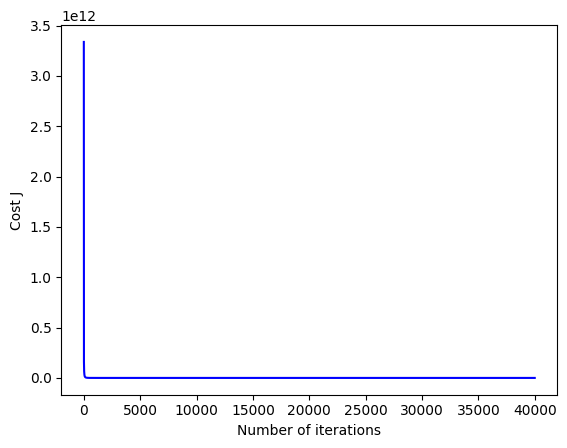

In [16]:
PolynomialRegression.costPlot(cost1,40000)

In [17]:
print(w)
print(b)

[[-9.63375107e+00]
 [-7.43564947e+01]
 [-1.71631365e+02]
 [-1.63655695e+02]
 [-5.69089457e+01]
 [-2.44791822e+00]
 [-7.05390662e+00]
 [-3.15997978e+00]
 [ 7.11170295e+00]
 [ 6.03247802e+00]
 [ 2.21202337e+00]
 [ 1.28314611e+01]
 [ 2.27642437e+01]
 [ 1.40819162e+01]
 [ 6.21602368e-01]
 [ 1.60358957e+00]
 [ 2.37668886e+01]
 [ 1.13118407e+00]
 [ 6.89526242e+01]
 [ 1.49137256e+02]
 [-1.98795823e+00]
 [-4.92572472e+01]
 [-1.68031494e+02]
 [-2.09949153e+02]
 [-8.80809529e+01]
 [ 3.99803087e-01]
 [ 4.20434362e+00]
 [ 8.31566405e+00]
 [ 1.00405029e+01]
 [ 1.38089167e+00]
 [ 3.26270755e+00]
 [ 4.38800314e+01]
 [ 8.58774026e-01]
 [ 1.40111976e+02]
 [ 2.60986357e+03]
 [ 2.46303005e+00]
 [ 1.11625143e+01]
 [ 1.79601737e+01]
 [ 3.94325659e+01]
 [ 1.80244451e-01]
 [ 4.84511132e-01]
 [ 1.69723464e+02]
 [ 2.82018086e+00]
 [ 9.92288177e+02]
 [ 1.18334051e+03]
 [ 5.18900949e+00]
 [ 1.24615716e+01]
 [ 4.94672436e+02]
 [ 3.16508511e+01]
 [ 4.42956367e+03]
 [ 2.60865800e+04]
 [ 3.03135057e+01]
 [ 5.2386886

In [18]:
predict_train=PolynomialRegression.predict(X_Poly_Normalized,w,b)
predict_test=PolynomialRegression.predict(X_Poly_Normalized_Test,w,b)
print(predict_train)
print(predict_test)

[[ -1296.65970594]
 [-27148.27043487]
 [ 64741.03047532]
 ...
 [  -286.08372191]
 [  8159.48996666]
 [  -254.86069629]]
[[  -8526.61484626]
 [ 202179.83989801]
 [  -3894.81117788]
 ...
 [  -7936.49177603]
 [  -8049.72397632]
 [-102170.46518772]]


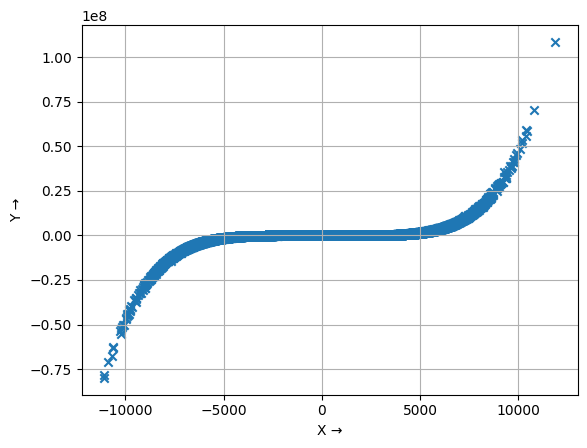

In [19]:
plt.grid(True)
plt.scatter(X_Train[:, 0],Y_Train, marker = "x")         # The plot is for feature A vs Y
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

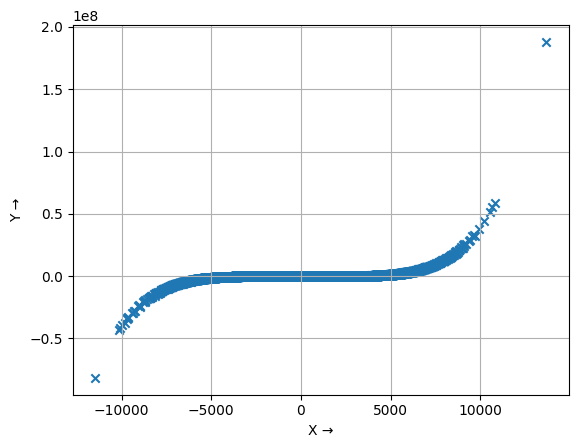

In [20]:
plt.grid(True)
plt.scatter(X_Test[:, 0],predict_test, marker = "x")         # The plot is for feature A vs Y_test
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

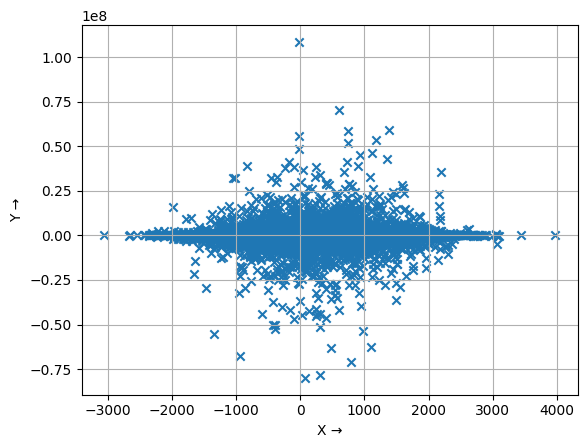

In [21]:
plt.grid(True)
plt.scatter(X_Train[:, 1],Y_Train, marker = "x")         # The plot is for feature B vs Y
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

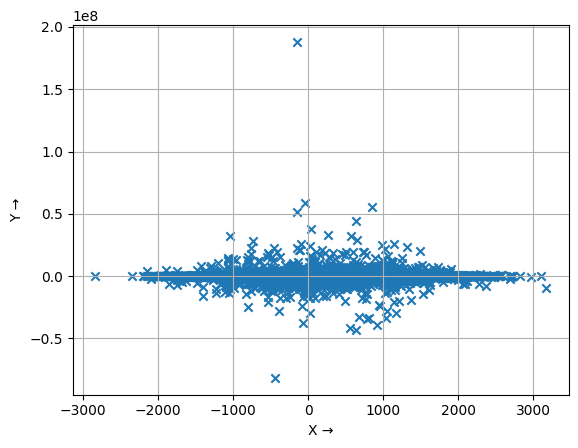

In [22]:
plt.grid(True)
plt.scatter(X_Test[:, 1],predict_test, marker = "x")         # The plot is for feature B vs Y_test
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

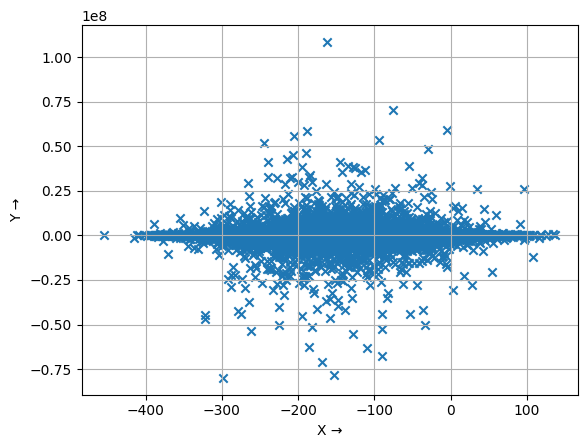

In [23]:
plt.grid(True)
plt.scatter(X_Train[:, 2],Y_Train, marker = "x")         # The plot is for feature C vs Y
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

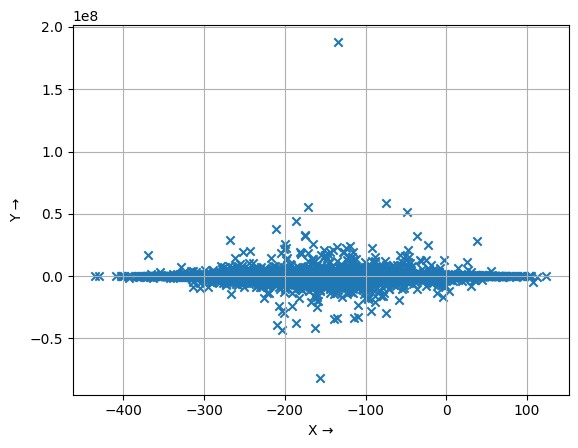

In [24]:
plt.grid(True)
plt.scatter(X_Test[:, 2],predict_test, marker = "x")         # The plot is for feature C vs Y_test
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

In [25]:
test_prediction=pd.DataFrame(predict_test,  columns=['Y PREDICTED'])
print(test_prediction)
test_prediction=test_prediction.to_csv('y_prediction_polynomial.csv')

        Y PREDICTED
0     -8.526615e+03
1      2.021798e+05
2     -3.894811e+03
3     -1.766185e+06
4     -4.025942e+04
...             ...
19995 -1.919037e+04
19996 -8.492178e+03
19997 -7.936492e+03
19998 -8.049724e+03
19999 -1.021705e+05

[20000 rows x 1 columns]
